In [10]:
library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)

In [11]:
data <- read_csv('../results/benchmark.csv')

Rows: 1240 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (6): cells, seed, celltype_score, global_score, region_score, run_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
data <- data %>% filter(cells %in% c(100,200,400,800,1600,3200,6400,12800,25600,51200,102400))
data <- data[data$method != 'PCA', ]
data <- data[data$global_score > 0,]
data$cells <- as.numeric(data$cells)
data <-  mutate(data,method=fct_relevel(method, 
            "SLAT", "Harmony", "Seurat"))
data <- data %>% 
  mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
  mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
  mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq'))
data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
head(data,4)

dataset,cells,seed,method,celltype_score,global_score,region_score,run_time
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
MERFISH,100,0,Harmony,0.69,0.28,0.38,0.4347532
MERFISH,100,0,PASTE,0.32,0.19,0.52,11.2311001
MERFISH,100,0,SLAT,0.45,0.29,0.56,5.1644223
MERFISH,100,0,Seurat,0.66,0.27,0.37,1.6960000


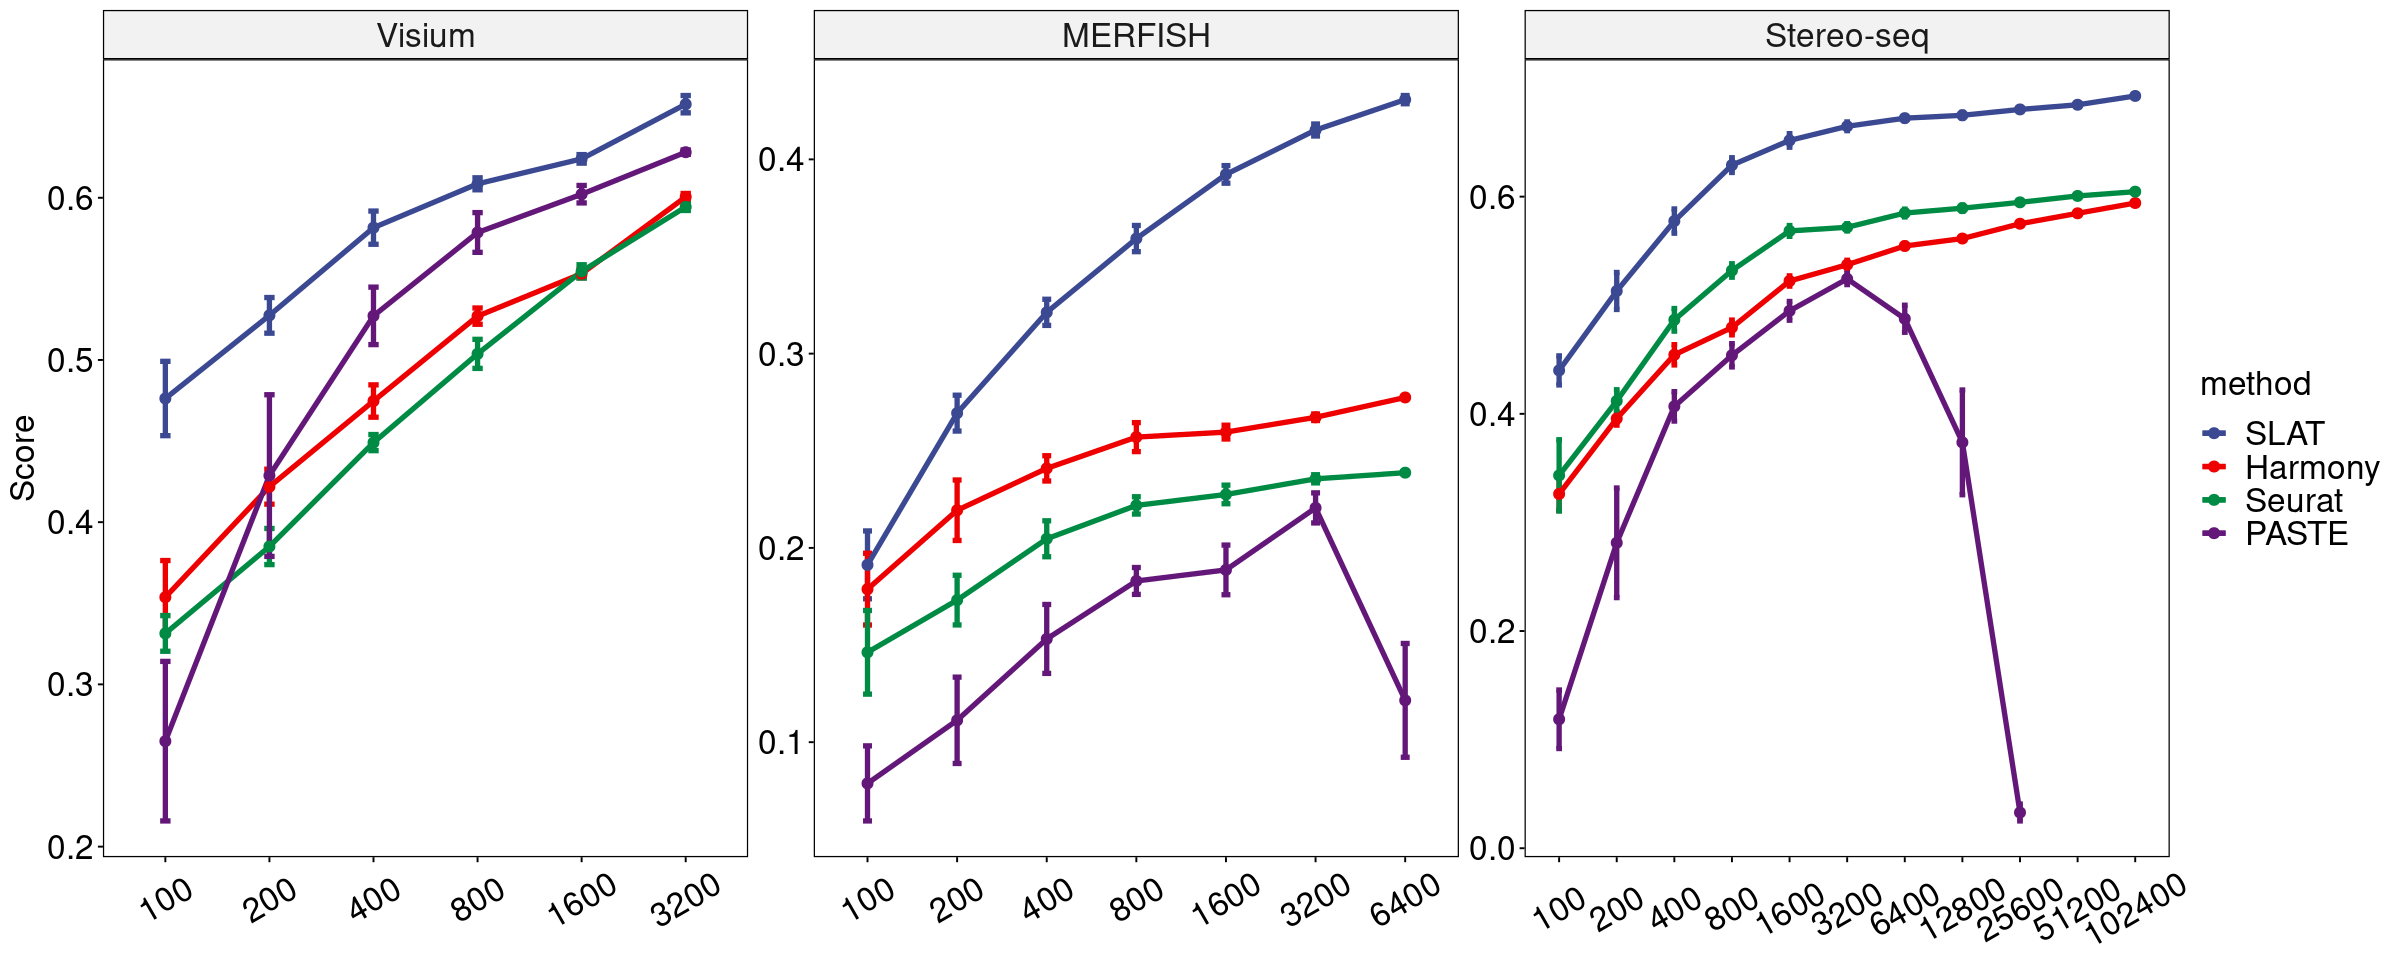

In [13]:
options(repr.plot.width=20, repr.plot.height=8)
ggline(data, x="cells", y="global_score", palette='aaas', color="method",
     add="mean_se", facet.by='dataset', xlab =F, ylab='Score',size=1.5, lab.size=10) %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) + facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))

# Time analysis

In [20]:
data <- read_csv('../results/benchmark.csv')

Rows: 1240 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (6): cells, seed, celltype_score, global_score, region_score, run_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
data <- data[data$cells %in% c(4000, 5000, 6000, 8000, 10000, 15000, 20000, 30000, 50000, 100000),]
data <- data[data$method != 'PCA', ]
data <- data[data$global_score > 0,]
data$cells <- as.numeric(data$cells)
data <-  mutate(data,method=fct_relevel(method, 
            "SLAT", "Harmony", "Seurat")) 
head(data,4)

dataset,cells,seed,method,celltype_score,global_score,region_score,run_time
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
merfish_mouse_hypothalamic,4000,0,Harmony,0.81775,0.27325,0.32275,6.427553
merfish_mouse_hypothalamic,4000,0,PASTE,0.28700,0.22425,0.75425,27.162961
merfish_mouse_hypothalamic,4000,0,SLAT,0.67800,0.43900,0.63850,13.588636
merfish_mouse_hypothalamic,4000,0,Seurat,0.76500,0.23975,0.29700,45.181000


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


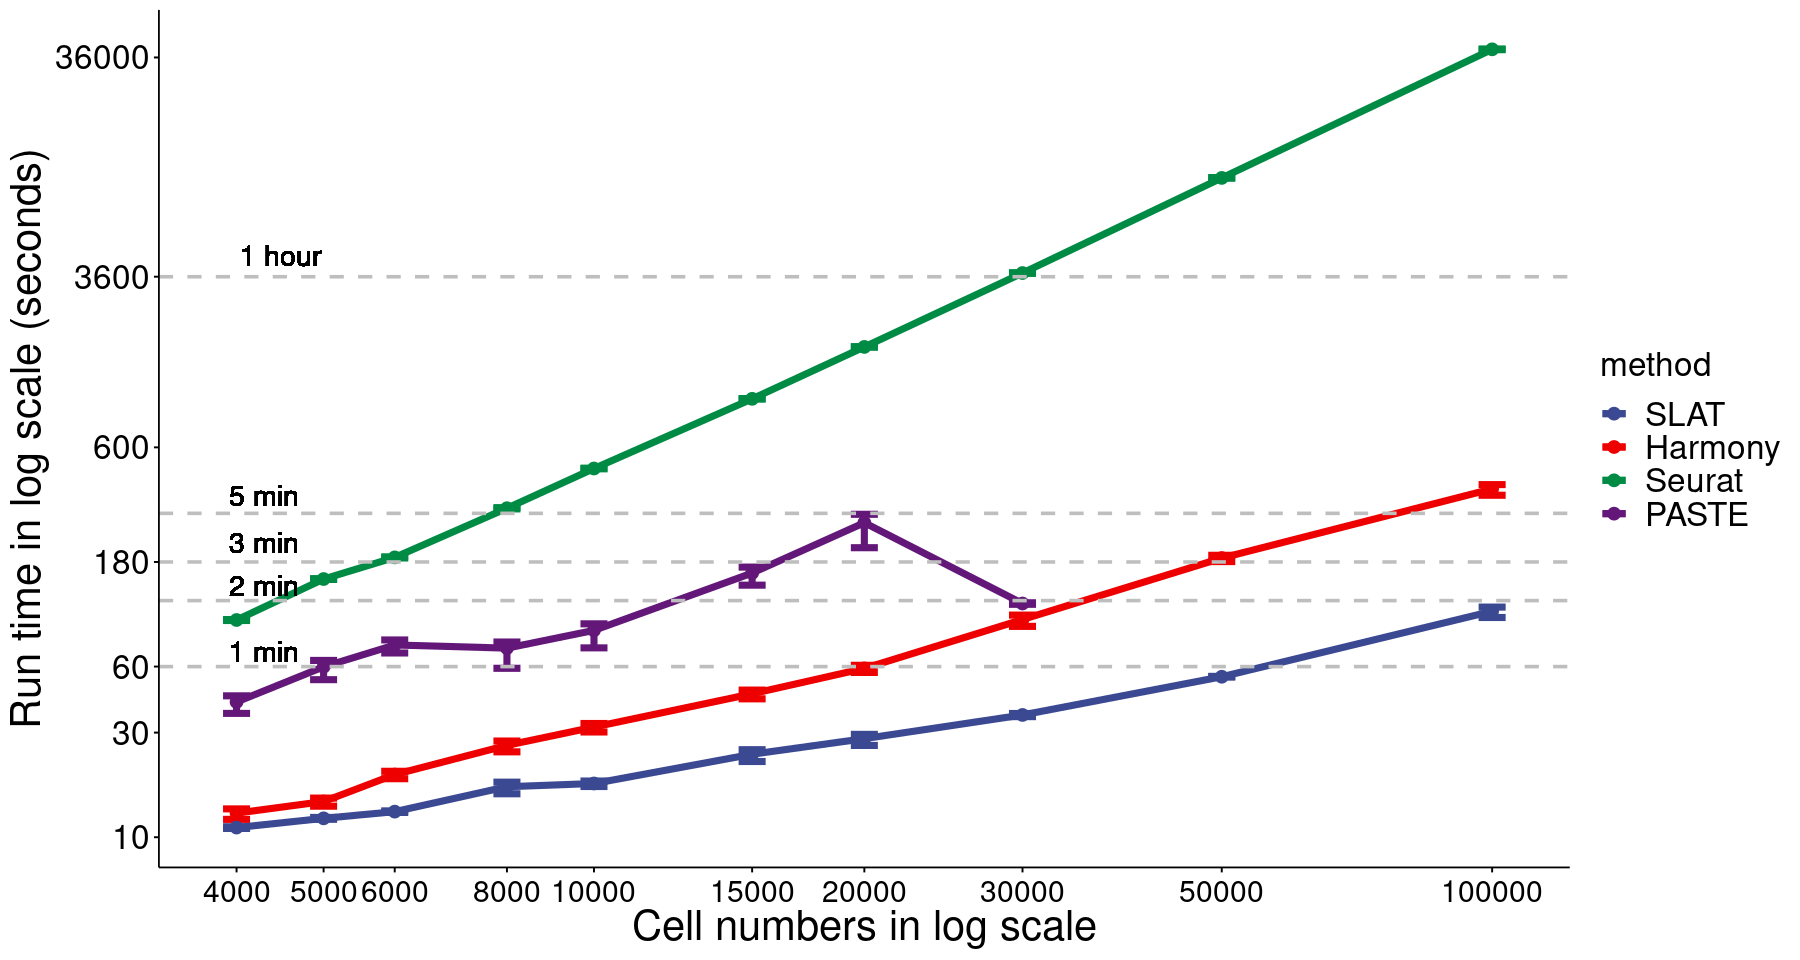

In [22]:
options(repr.plot.width=15, repr.plot.height=8)
ggline(data[data$dataset=='stereo_mouse_embryo' & data$method!='PCA',], x="cells", y="run_time", palette='aaas', color="method",
        add="mean_se", xlab ='Cell numbers in log scale', ylab='Run time in log scale (seconds)', size=2, lab.size=10, numeric.x.axis=T) %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=18, font.ytickslab=20, font.y=25, font.x=25)  + 
 scale_y_continuous(trans='log2') +  scale_x_continuous(trans='log2') +
 theme(axis.text.x=element_text(angle=0, vjust=0.5, hjust=0.5)) +
 geom_hline(yintercept=3600, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 4500, label='1 hour', hjust=-1), size=6) +
 geom_hline(yintercept=120, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 140, label='2 min', hjust=-1), size=6) +
 geom_hline(yintercept=180, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 220, label='3 min', hjust=-1), size=6) +
 geom_hline(yintercept=300, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 360, label='5 min', hjust=-1), size=6) +
 geom_hline(yintercept=60, linetype="dashed", color="grey", size=1)+ geom_text(aes(0, 70, label='1 min', hjust=-1), size=6) +
 scale_y_continuous(breaks=c(10,30,60,180,600,3600,36000), trans='log2') +
 scale_x_continuous(breaks=c(4000, 5000, 6000, 8000, 10000, 15000, 20000, 30000, 50000, 100000), trans='log2')